## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problema

Considere los siguientes puntos

```
x = [1., 2., 3., 4., 5.]
y = [1.20,  0.31, 3.92, 3.78, 4.47]
```

Basados en el metodo de los mínimos cuadrados, se puede ajustar una parábola a los puntos

$$ y = a + bx + cx^2$$

En este problema vamos a considerar la regresión, por medio de la gradiente descendiente,

a) El método de minimos cuadrados por gradiente descediente considera minimizar la distancia cuadratica entre los puntos. Implemente una función que retorne la siguiente función de costo, la cual se espera que sea mínima en el punto optimo de la regresión. 

$$
\mathcal{L} = \sum_{i=1}^N(y_i - (a + bx_i + cx_i^2))^2
$$

Donde $a$, $b$, y $c$ son los valores a optimizar. 

In [2]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1.20,  0.31, 3.92, 3.78, 4.47])

def loss(x, y, a, b, c):
  loss = 0
  for i in range(x.size):
        loss += (y[i] - (a + b*x[i] + c*x[i]**2))**2
  return loss

# codigo para verificar su respuesta
loss(x, y, -1, 2, 3)

9960.6318

b) Para el algoritmo de gradiente descendiente, se requiere la gradiente de la función de costo. Obtenga la gradiente de la función de costo de forma analitica,

Su expresión aquí,

$$
\vec{\nabla} \mathcal{L} = \Big(\frac{\partial  \mathcal{L}}{\partial a} , \quad \frac{\partial  \mathcal{L}}{\partial b}, \quad \frac{\partial  \mathcal{L}}{\partial c} \Big) =\Big(\  \sum_{i=1}^N -2(y_i -(a + bx_i +cx_i^2)), \sum_{i=1}^N -2x_i(y_i -(a + bx_i +cx_i^2)) , \sum_{i=1}^N -2x_i^2(y_i -(a + bx_i +cx_i^2)) \Big)
$$

c) Implemente una función que retorne la gradiente de la función de costo obtenida en el númeral anterior.

In [17]:
def grad_loss(x, y, a, b, c):
    grad = np.zeros(3)
    loss = -2*(y - (a + b*x + c*x**2))
    grad[0] = np.sum(loss)
    grad[1] = np.sum(x*loss)
    grad[2] = np.sum(x**2 * loss)
    return grad
    
# codigo para verificar su respuesta

grad_loss(x, y, -1, 2, 0)

array([ 22.64,  87.9 , 370.1 ])

d) Implemente el algoritmo de gradiente descendiente, para encontrar los valores optimos de la regresión, use $e = 0.0001$, 10000 iteraciones, e imprima el valor de la función de costo cada 100 iteraciones. 

El algoritmo de gradiente descendiente nos indica que los puntos optimos de la regresión se van actualizando iterativamente, a partir de la regla, 

$$
  \vec{x} = \vec{x} - e\vec{\nabla} \mathcal{L}
$$

Donde $e$ es el tamaño del paso, y $\vec{x} = [a, b, c]$. Pueden usar el siguiente notebook como guía [gradiente descendiente](https://github.com/diegour1/CompMetodosComputacionales/blob/main/Notebooks/08%20-%20Gradient_Descent_Neural_Networks.ipynb).


In [59]:
# su codigo aqui

gamma = 0.0001
N = 30000
h = 0.0001
next_ = np.array([1.,1.,1.])

for i in range(N):
    next_ = next_ - gamma*grad_loss(x,y,next_[0],next_[1],next_[2])
    if i%100 == 0:
        print("Iteración n° %s: %s. Loss: %s"%(i,next_,loss(x,y,*tuple(next_))))



Iteración n° 0: [0.987736 0.95121  0.79019 ]. Loss: 713.43570609008
Iteración n° 100: [ 0.90958628  0.73080797 -0.00508324]. Loss: 5.102620281058362
Iteración n° 200: [0.87986457 0.6995542  0.00381521]. Loss: 4.9086276081640445
Iteración n° 300: [0.85258465 0.67140202 0.01185943]. Loss: 4.748436040803219
Iteración n° 400: [0.8275224  0.64606508 0.01912822]. Loss: 4.616106316433721
Iteración n° 500: [0.80447434 0.6232834  0.02569311]. Loss: 4.506743053469981
Iteración n° 600: [0.78325575 0.60282096 0.03161903]. Loss: 4.416311277868654
Iteración n° 700: [0.76369891 0.5844635  0.03696496]. Loss: 4.341485197168065
Iteración n° 800: [0.74565155 0.56801647 0.04178441]. Loss: 4.279523554139701
Iteración n° 900: [0.72897544 0.55330326 0.04612599]. Loss: 4.228166888394939
Iteración n° 1000: [0.71354506 0.54016355 0.0500338 ]. Loss: 4.185552855384869
Iteración n° 1100: [0.69924647 0.52845175 0.05354791]. Loss: 4.150146429009467
Iteración n° 1200: [0.6859762  0.51803572 0.05670468]. Loss: 4.12068

Iteración n° 11600: [0.29643194 0.60960226 0.05771167]. Loss: 3.8612999220945565
Iteración n° 11700: [0.29402859 0.6114052  0.05743228]. Loss: 3.8603894570583845
Iteración n° 11800: [0.291632   0.61320315 0.05715367]. Loss: 3.8594840821438496
Iteración n° 11900: [0.28924215 0.6149961  0.05687582]. Loss: 3.858583768892456
Iteración n° 12000: [0.28685902 0.61678407 0.05659875]. Loss: 3.8576884890050387
Iteración n° 12100: [0.28448259 0.61856707 0.05632243]. Loss: 3.8567982143408264
Iteración n° 12200: [0.28211283 0.62034511 0.05604689]. Loss: 3.8559129169165307
Iteración n° 12300: [0.27974973 0.6221182  0.0557721 ]. Loss: 3.8550325689054254
Iteración n° 12400: [0.27739326 0.62388635 0.05549808]. Loss: 3.8541571426364674
Iteración n° 12500: [0.27504341 0.62564957 0.05522482]. Loss: 3.8532866105933894
Iteración n° 12600: [0.27270015 0.62740788 0.05495232]. Loss: 3.85242094541384
Iteración n° 12700: [0.27036347 0.62916129 0.05468058]. Loss: 3.8515601198884895
Iteración n° 12800: [0.26803334

Iteración n° 23600: [0.05121814 0.79362952 0.02918933]. Loss: 3.781549642862761
Iteración n° 23700: [0.04950158 0.79491781 0.02898966]. Loss: 3.781085035783067
Iteración n° 23800: [0.04778984 0.7962025  0.02879054]. Loss: 3.780623026170694
Iteración n° 23900: [0.04608288 0.79748359 0.02859198]. Loss: 3.7801635995040437
Iteración n° 24000: [0.0443807  0.7987611  0.02839397]. Loss: 3.779706741342702
Iteración n° 24100: [0.04268328 0.80003503 0.02819652]. Loss: 3.7792524373269942
Iteración n° 24200: [0.04099062 0.80130539 0.02799963]. Loss: 3.7788006731775186
Iteración n° 24300: [0.0393027  0.8025722  0.02780328]. Loss: 3.778351434694709
Iteración n° 24400: [0.0376195  0.80383546 0.02760748]. Loss: 3.777904707758383
Iteración n° 24500: [0.03594101 0.80509519 0.02741223]. Loss: 3.777460478327299
Iteración n° 24600: [0.03426722 0.80635139 0.02721753]. Loss: 3.7770187324387168
Iteración n° 24700: [0.03259811 0.80760407 0.02702337]. Loss: 3.7765794562079584
Iteración n° 24800: [0.03093368 0.8

e) Imprima los valores finales de la regresión y de la función de costo para los valores optimos.

In [60]:
# su codigo aqui
print("a:%s, b:%s, c:%s"%(next_[0],next_[1],next_[2]))
print("Loss: %s"%(loss(x,y,*tuple(next_))))


a:-0.049477204934031745, b:0.8692025893451499, c:0.017476016011877153
Loss: 3.756497815088808


f) Ahora obtenga los valores optimos de la regresión, usando el método matricial. Puede usar el siguiente notebook como guía, [Minimos cuadrados](https://github.com/diegour1/CompMetodosComputacionales/blob/main/Notebooks/05%20-%20fit_lineal_y_solucion_sistema_de_ecuaciones.ipynb).


In [61]:
param = np.zeros(3)
# su codigo aqui
Pt = np.array([np.ones(x.size),x,x**2])
P = Pt.T

param = np.linalg.inv(Pt@P)@Pt@y

print(param, loss(x, y, *tuple(param)))

[-0.562       1.25385714 -0.04214286] 3.698445714285714


g) ¿La función de costo con el método de regresión matricial es mayor o menor que con el método de gradiente descediente? ¿Sí, No, por qué?

La función de costo de la regresión matricial es menor a la del método del descenso del gradiente. Esto se puede deber a que el método de descenso del gradiente es un método iterativo y éste conlleva un error a la hora de hacer las aproximaciones que está ligado al número de iteraciones que se haga.


h) Realice una gráfica mostrando los puntos $x$ y $y$, ademas de las gráficas de las funciones obtenidas con el método de gradiente descendiente y con el método de regresión matricial.

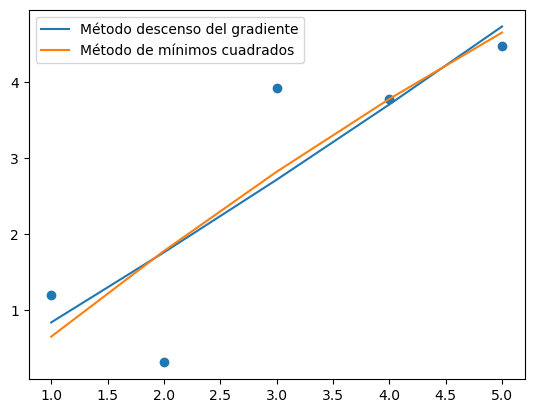

In [62]:
(a1,b1,c1) = tuple(next_)
(a2,b2,c2) = tuple(param)

fig, ax = plt.subplots()
ax.scatter(x,y)
f1, = ax.plot(x,a1 + b1*x + c1*x**2)
f2, = ax.plot(x,a2 + b2*x + c2*x**2)
f1.set_label("Método descenso del gradiente")
f2.set_label("Método de mínimos cuadrados")
ax.legend()
